In [1]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Audio

In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dir='/content/drive/MyDrive/Human Audio'

In [7]:
os.listdir(dir)

['Actor_23',
 'Actor_21',
 'Actor_17',
 'Actor_20',
 'Actor_18',
 'Actor_22',
 'Actor_16',
 'Actor_24',
 'Actor_19',
 'Actor_11',
 'Actor_13',
 'Actor_10',
 'Actor_15',
 'Actor_06',
 'Actor_14',
 'Actor_09',
 'Actor_12',
 'Actor_07',
 'Actor_08',
 'Actor_02',
 'Actor_01',
 'Actor_03',
 'Actor_04',
 'Actor_05']

In [9]:
for actor in os.listdir(dir):
  path=os.path.join(dir,actor)
  print(len(os.listdir(path)))

60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60


In [10]:
file_name=[]
file_path=[]
label=[]

In [12]:
label_map={0:'Neutral',1:'Calm',2:'Happy',3:'Sad',4:'Angry',5:'Fearful',6:'Disgust',7:'Surprised'}

In [13]:
for actor in os.listdir(dir):
  path=os.path.join(dir,actor)
  c=1
  for file in os.listdir(path):
    name=str(actor)+' '+str(c)
    file_name.append(name)
    c+=1
    file_path.append(os.path.join(path,file))
    l=file.split('-')[2]
    label.append(int(l)-1)

In [14]:
df=pd.DataFrame({'File_Name':file_name,'File_Path':file_path,'Label':label})

In [15]:
df

,File_Name,File_Path,Label
0,Actor_23 1,/content/drive/MyDrive/Human Audio/Actor_23/03...,4
1,Actor_23 2,/content/drive/MyDrive/Human Audio/Actor_23/03...,0
2,Actor_23 3,/content/drive/MyDrive/Human Audio/Actor_23/03...,6
3,Actor_23 4,/content/drive/MyDrive/Human Audio/Actor_23/03...,4
4,Actor_23 5,/content/drive/MyDrive/Human Audio/Actor_23/03...,6
...,...,...,...
1435,Actor_05 56,/content/drive/MyDrive/Human Audio/Actor_05/03...,5
1436,Actor_05 57,/content/drive/MyDrive/Human Audio/Actor_05/03...,3
1437,Actor_05 58,/content/drive/MyDrive/Human Audio/Actor_05/03...,6
1438,Actor_05 59,/content/drive/MyDrive/Human Audio/Actor_05/03...,5


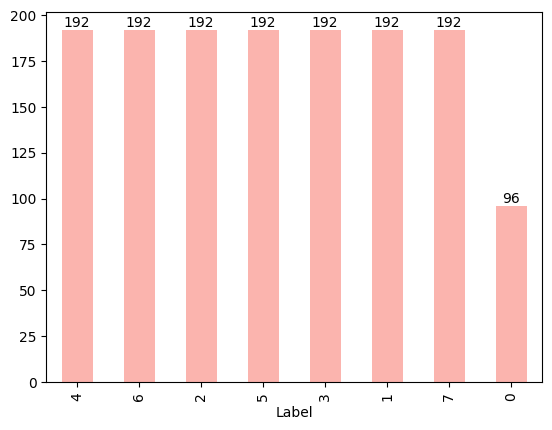

In [16]:
ax=df['Label'].value_counts().plot(kind='bar',cmap='Pastel1')
for bars in ax.containers:
  ax.bar_label(bars)

In [23]:
def details(num):
  data,sr=librosa.load(df['File_Path'][num])
  fig,ax=plt.subplots(1,2,figsize=(20,5))
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])
  S=librosa.stft(data)
  S_b=librosa.amplitude_to_db(np.abs(S))
  librosa.display.specshow(S_b,sr=sr,x_axis='time',y_axis='hz',ax=ax[1])

<ipython-input-23-1599d24f0569>:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])


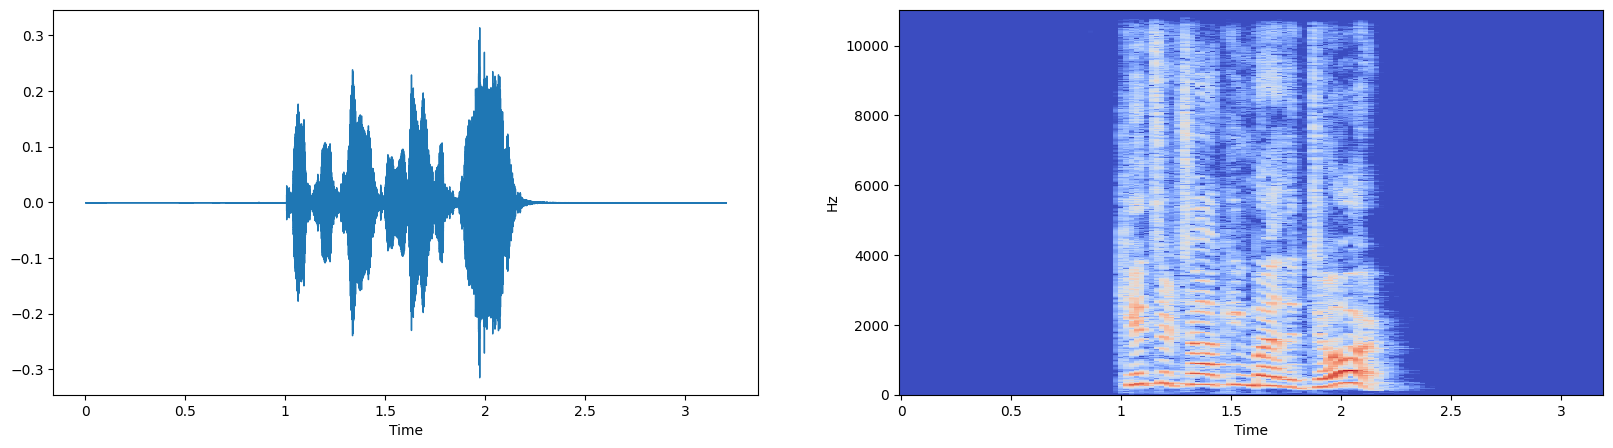

In [24]:
details(5)

<ipython-input-23-1599d24f0569>:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])


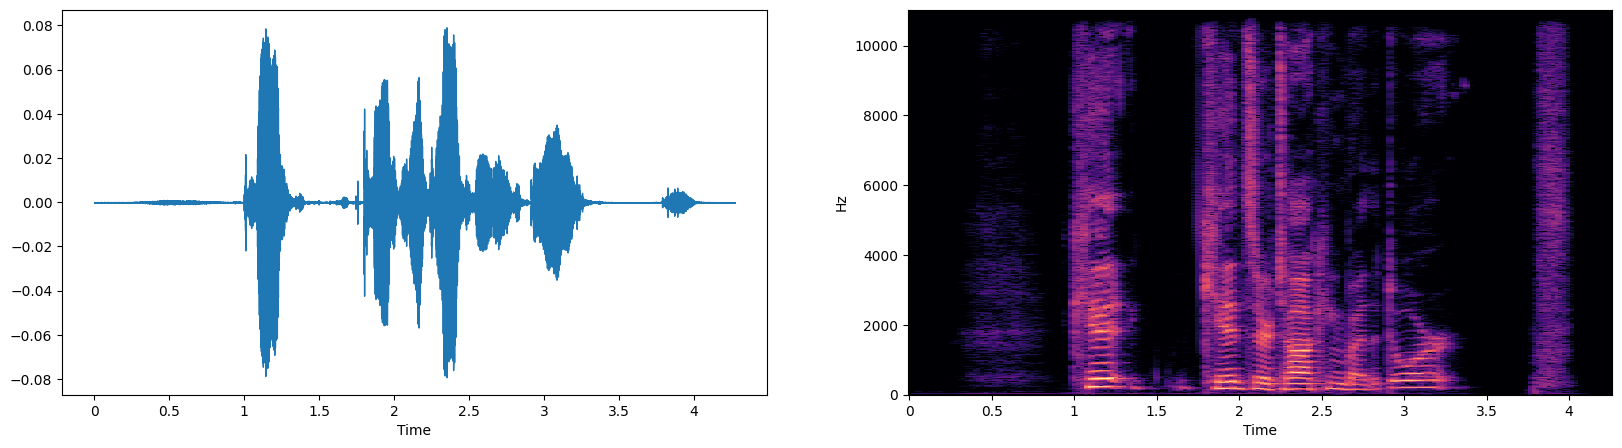

In [25]:
details(10)

<ipython-input-23-1599d24f0569>:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])


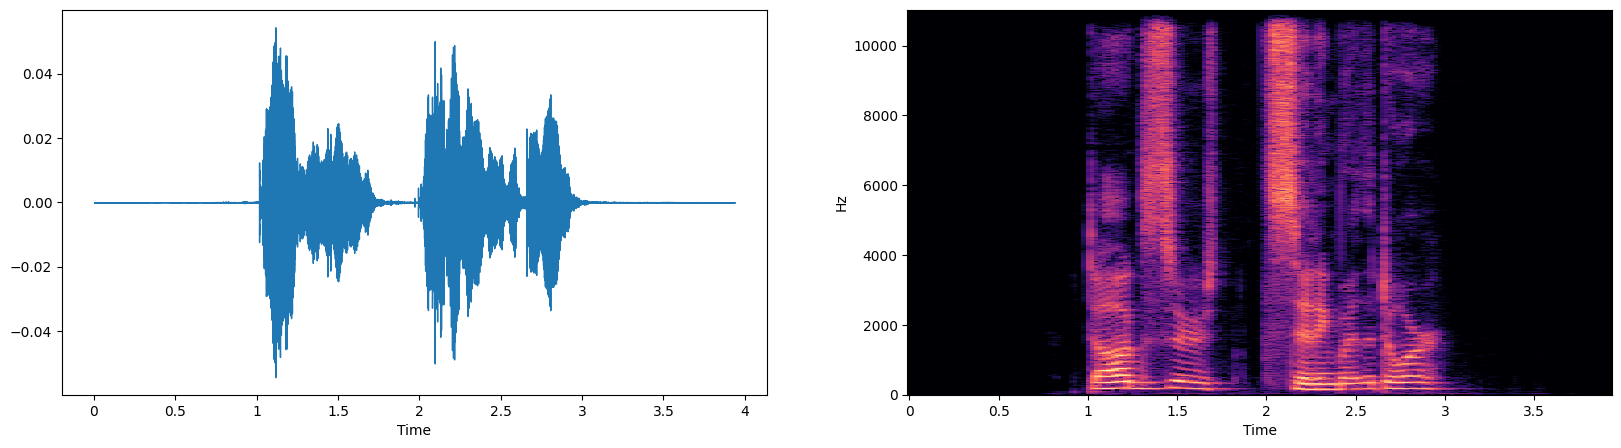

In [26]:
details(20)

<ipython-input-23-1599d24f0569>:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])


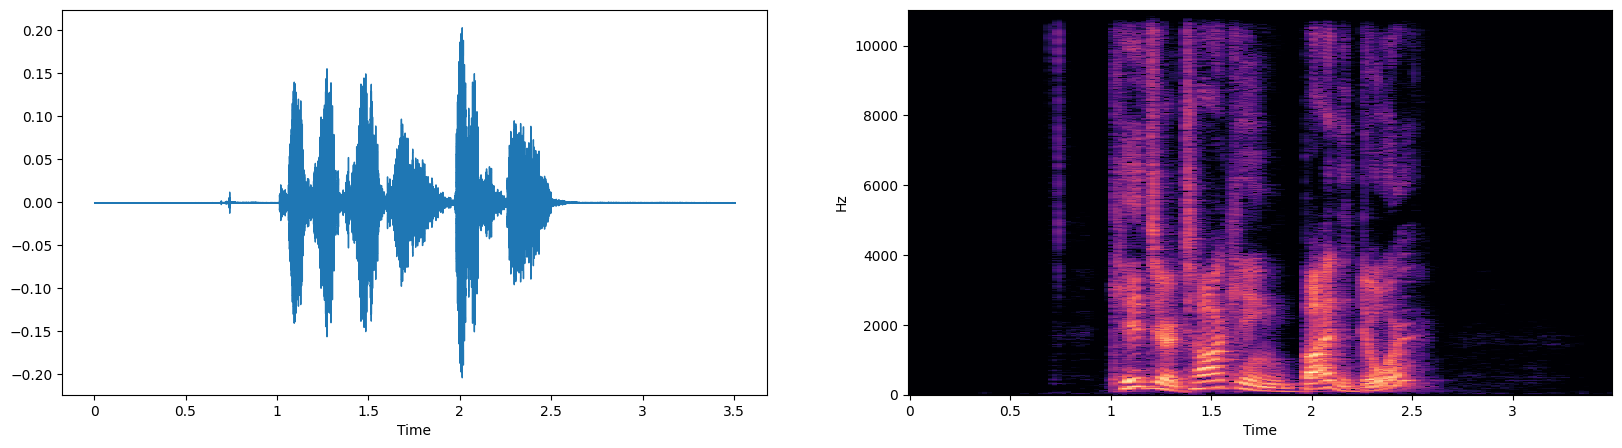

In [27]:
details(100)

<ipython-input-23-1599d24f0569>:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=data,sr=sr,x_axis='time',ax=ax[0])


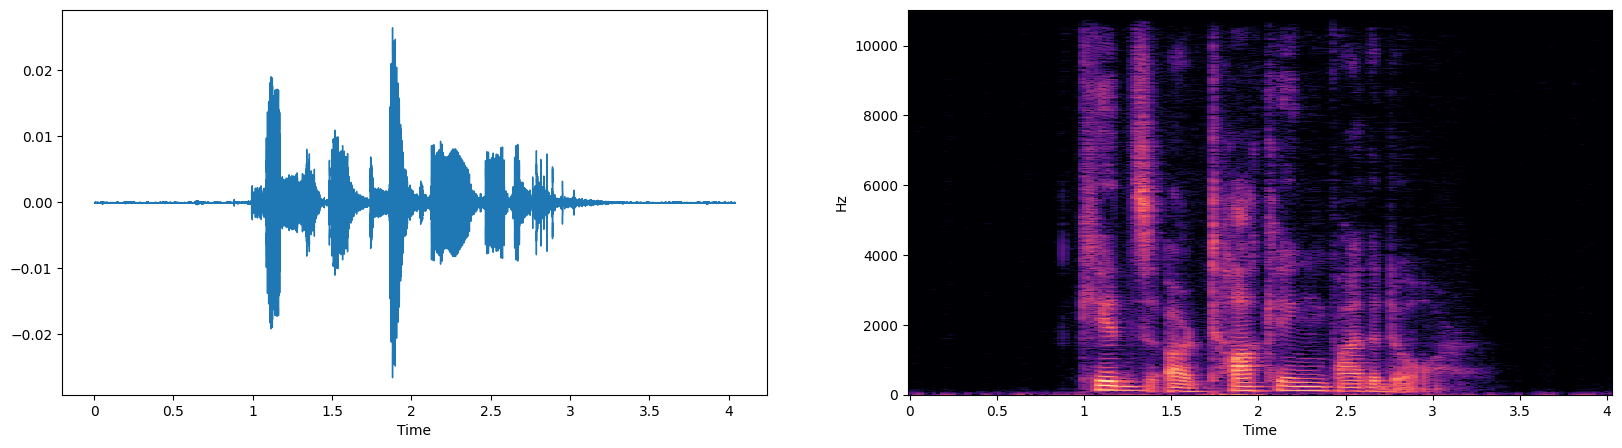

In [28]:
details(1400)

Data Augmentation

In [40]:
def add_noise(data):
  noise=0.05*np.random.uniform()*np.amax(data)
  data=data+noise*np.random.normal(size=data.shape[0])
  return data

In [46]:
def stretch(data,rate=0.8):
  return librosa.effects.time_stretch(data,rate=0.8)

In [31]:
def shift_data(data):
  shift_range=int(np.random.uniform(low=-5,high=5)*1000)
  return np.roll(data,shift_range)

In [54]:
def pitch(data, sr, factor=0.7):
  return librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)

In [33]:
data, sr=librosa.load(df['File_Path'][20])

In [41]:
x=add_noise(data)

In [48]:
y=stretch(data)

In [50]:
z=shift_data(data)

In [55]:
w=pitch(data,sr)

In [56]:
Audio(data,rate=sr)

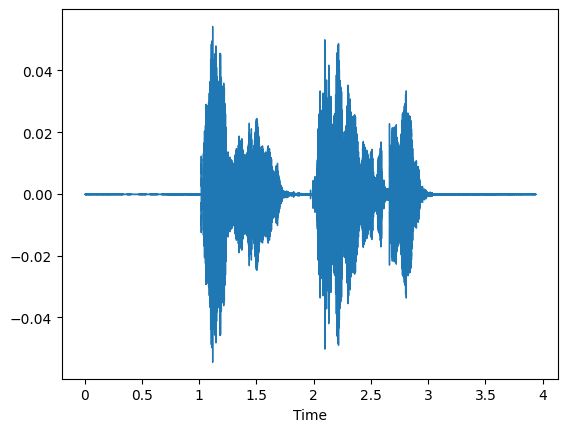

In [57]:
librosa.display.waveshow(data, sr=sr)

In [58]:
Audio(x, rate=sr)

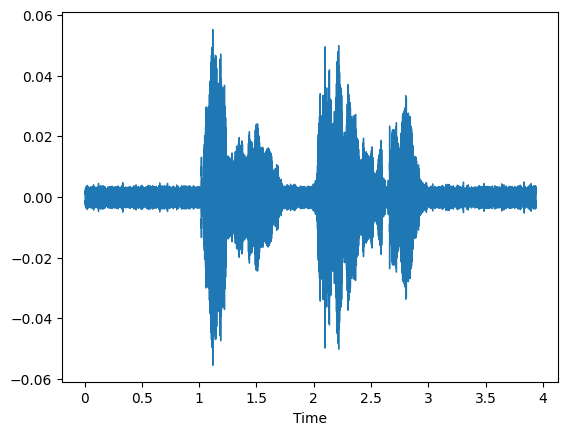

In [60]:
librosa.display.waveshow(x, sr=sr)

In [61]:
Audio(y, rate=sr)

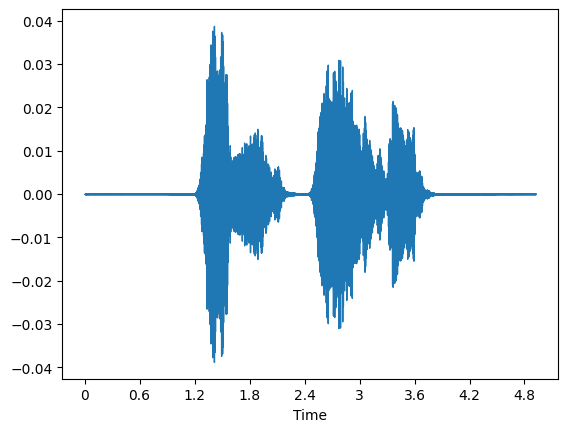

In [62]:
librosa.display.waveshow(y, sr=sr)

In [63]:
Audio(z, rate=sr)

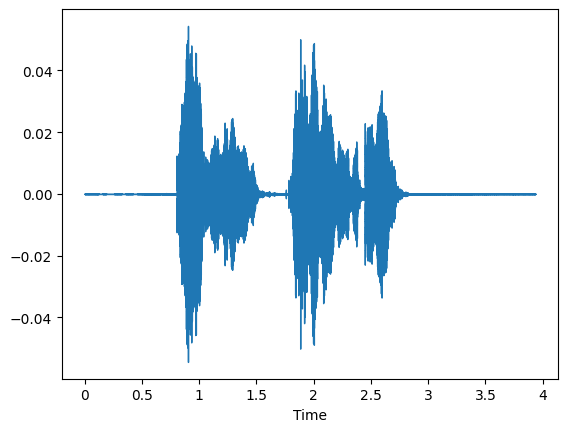

In [64]:
librosa.display.waveshow(z, sr=sr)

In [65]:
Audio(w, rate=sr)

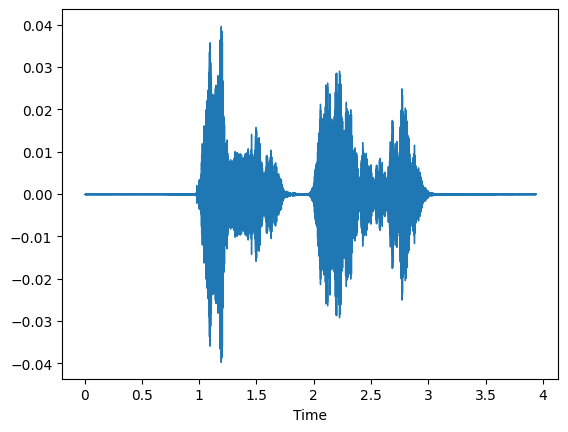

In [66]:
librosa.display.waveshow(w, sr=sr)

In [68]:
result=[]

In [70]:
for path in df['File_Path']:
  res=np.array([])

  data, sr=librosa.load(path)

  m=np.mean(librosa.feature.mfcc(y=data,sr=sr,n_mfcc=30).T,axis=0)
  z=np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
  c=np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)),sr=sr).T,axis=0)
  mel=np.mean(librosa.feature.melspectrogram(y=data,sr=sr).T,axis=0)

  res=np.hstack((res,m,z,c,mel))

  result.append(res)

In [71]:
result=np.array(result)

In [72]:
result.shape

(1440, 171)

In [73]:
X=result
y=df['Label']

In [74]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

In [78]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [108]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(171,1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 171, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 86, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 86, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 43, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 43, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 22, 128)          

In [109]:
es=EarlyStopping(restore_best_weights=True,monitor='val_loss',verbose=1,patience=10)
p=ReduceLROnPlateau(factor=0.1,patience=10,verbose=1,monitor='val_loss')

In [120]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc=StandardScaler()

In [114]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [115]:
X_train=np.reshape(X_train,X_train.shape+(1,))
X_test=np.reshape(X_test,X_test.shape+(1,))

In [90]:
X_train.shape

(1224, 171, 1)

In [91]:
X_test.shape

(216, 171, 1)

In [118]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=8)

In [121]:
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), callbacks=[es, p])

Epoch 1/100


39/39 [==============================] - 5s 98ms/step - loss: 1.9836 - accuracy: 0.1969 - val_loss: 1.9794 - val_accuracy: 0.1852 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 2s 51ms/step - loss: 1.9368 - accuracy: 0.2369 - val_loss: 1.9487 - val_accuracy: 0.2269 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 2s 53ms/step - loss: 1.9020 - accuracy: 0.2623 - val_loss: 1.8499 - val_accuracy: 0.2731 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 2s 52ms/step - loss: 1.8627 - accuracy: 0.2614 - val_loss: 1.8533 - val_accuracy: 0.3102 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 2s 52ms/step - loss: 1.8182 - accuracy: 0.2794 - val_loss: 1.8061 - val_accuracy: 0.2778 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 2s 57ms/step - loss: 1.7777 - accuracy: 0.3031 - val_loss: 1.7349 - val_accuracy: 0.3611 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 3s 75ms/step - loss: 1.7223 -

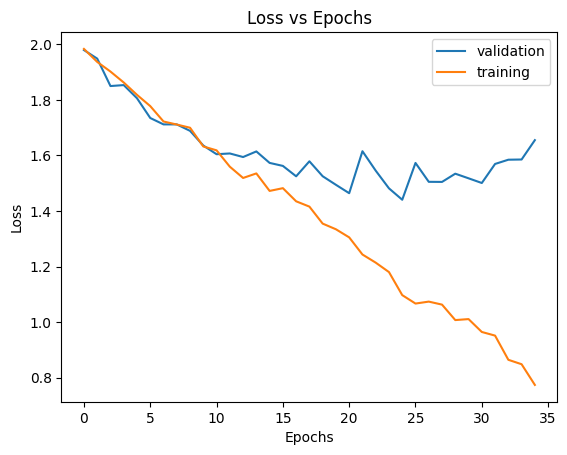

In [125]:
plt.plot(history.history['val_loss'],label='validation')
plt.plot(history.history['loss'],label='training')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

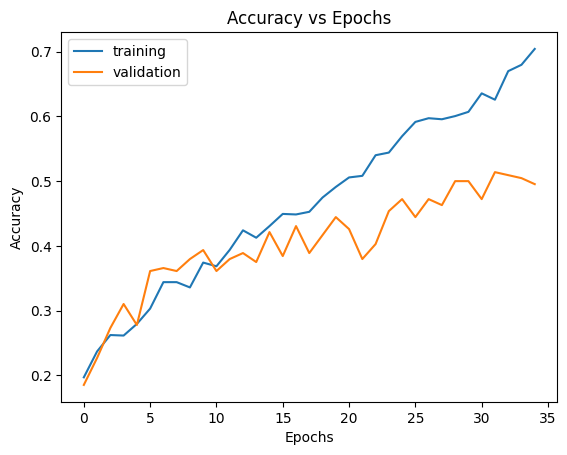

In [126]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [135]:
y_pred=model.predict(X_test)

7/7 [==============================] - 0s 18ms/step


In [137]:
y=[]
for sample in y_pred:
  y.append(np.argmax(sample))

In [139]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score

In [141]:
accuracy_score(y_test,y)

0.4722222222222222

In [144]:
precision_score(y_test,y,average='micro')

0.4722222222222222

In [145]:
c=confusion_matrix(y_test,y)

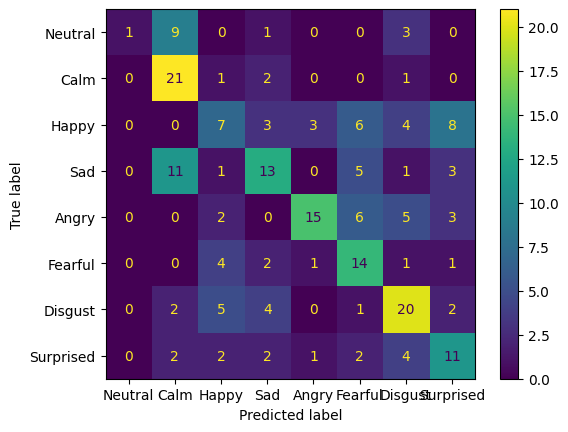

In [147]:
ConfusionMatrixDisplay(c,display_labels=label_map.values()).plot()